# 重ね合わせとアダマールゲート

## ライブラリのインポート

In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## 初期状態が０のとき

In [2]:
qc0 = QuantumCircuit(1, 1)

### 量子回路

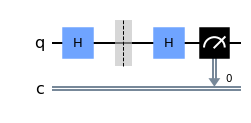

In [3]:
# HADゲート追加
qc0.h(0)
# 最適化を防ぐ(回路を区切る。)
qc0.barrier(0)
# HADゲート追加
qc0.h(0)
# 測定する(クラシカルビットに結果を入れる。)
qc0.measure(0,0)

qc0.draw(output='mpl')

### 実行
試行数をshotsに指定してプログラムを量子コンピューターで実行

In [4]:
provider = IBMQ.load_account()
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)

least_busy_backend = least_busy(small_devices)
print('Least Busy Backend:', least_busy_backend)

job_0 = execute(qc0, least_busy_backend, shots=200)
job_monitor(job_0)
result_0 = job_0.result()

Least Busy Backend: ibmq_manila
Job Status: job has successfully run


### 結果の確認

結果からビットパターン毎に何回そのパターンとなったかという数を取得.

In [5]:
counts_0 = result_0.get_counts(qc0)
# 0がほとんどのはず
print(counts_0)

{'0': 194, '1': 6}


### ヒストグラムの表示
ビットパターン毎の集計結果を棒グラフで表示.

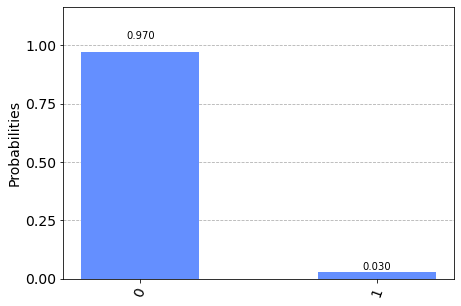

In [6]:
plot_histogram(counts_0)

## 初期状態が１のとき

In [7]:
qc1 = QuantumCircuit(1, 1)

### 量子回路

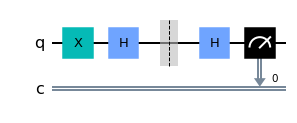

In [8]:
# NOTゲートを追加する。
qc1.x(0)
qc1.h(0)
qc1.barrier(0)
qc1.h(0)
qc1.measure(0,0)

qc1.draw(output='mpl')

### 実行
試行数をshotsに指定してプログラムを量子コンピューターで実行

In [9]:
job_1 = execute(qc1, least_busy_backend, shots=200)
job_monitor(job_1)
result_1 = job_1.result()

Job Status: job has successfully run


### 結果の確認

結果からビットパターン毎に何回そのパターンとなったかという数を取得.

In [10]:
counts_1 = result_1.get_counts(qc1)
print(counts_1)

{'0': 4, '1': 196}


### ヒストグラムの表示
ビットパターン毎の集計結果を棒グラフで表示.

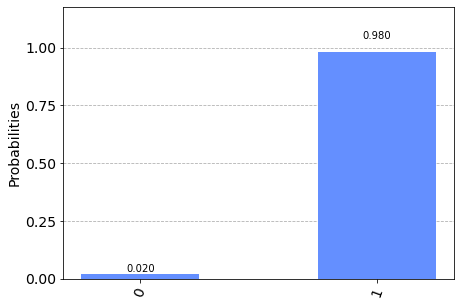

In [11]:
plot_histogram(counts_1)